In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('lab9-csv')
df

,t1,ch1,t2,ch2
0,-0.014992,-0.025095,-0.014992,-2.568680
1,-0.014972,-0.015181,-0.014972,-2.573650
2,-0.014952,0.009604,-0.014952,-2.578619
3,-0.014932,0.034390,-0.014932,-2.573650
4,-0.014912,0.009604,-0.014912,-2.578619
...,...,...,...,...
1495,0.014908,-0.005267,0.014908,-2.578619
1496,0.014928,-0.035010,0.014928,-2.573650
1497,0.014948,-0.020138,0.014948,-2.583589
1498,0.014968,0.039347,0.014968,-2.578619


In [16]:
df = pd.read_excel('wall_distance.xlsx')
df

,Known distance to the wall,Measured distance from the wall,% error
0,1,1.15,15
1,2,2.00,0
2,3,3.00,0
3,4,3.80,20


In [17]:
transfer_function = ((df['Measured distance from the wall'] * 343) / 2)
transfer_function

0    197.225
1    343.000
2    514.500
3    651.700
Name: Measured distance from the wall, dtype: float64

**Explanation:** I gathered data for the plot of the known distance versus the measured distance by using a ruler and notebook to take distance measurements, incrementing by 1 inch to get 4 measured points. To find the measured distance to the wall, I used the measurements from the process I explained above multiplied by the speed of sound in dry air at 20 °C (343 m/s), which I googled. And, I divided by 2 accounting for the transmit/receive process the transducer compeltes before I can see its period clearly on the O-scope. 

**Caption:** The graph below includes the Knwon distance of the wall in inches versus the measured distance to the wall in inches. I added a line of best fit to show how far off my scatter plot points are from the actual. 

**How well my range finder works:** I added a percent error category in my excel dataframe to quantify how well it works. For the known distance of 1 and 4, it performed suboptimally. For 1 it gave a higher measured distance and for 4 it gave a lower measured distance. 

**Accuracy of the distance measurement for the range finder and reasoning:** The ideal graph is 1:1 so it should look more like y = x instead of disjointed shape as it does now. Therefore the accuracy of the distance measurement is off the ideal. I hypothesize adding more filters could fix its accuracy or using an object that has a stronger transmit/receive property than an O-scope box could also increase the accuracy. I attempted to remove objects in front of the part I was sensing but the surface of the table or not enough scope for the signal could've also caused it to perform less accurately than the desired. 

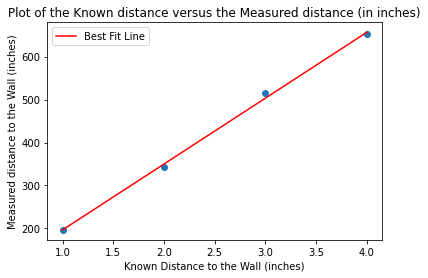

Equation of the line of best fit: y =  
153.5 x + 42.88


In [31]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(df['Known distance to the wall'], transfer_function)
plt.xlabel('Known Distance to the Wall (inches)')
plt.ylabel('Measured distance to the Wall (inches)')
plt.title('Plot of the Known distance versus the Measured distance (in inches)')
coeffs = np.polyfit(df['Known distance to the wall'], transfer_function, 1)
line = np.poly1d(coeffs)

# Adding the line of best fit
plt.plot(df['Known distance to the wall'], line(df['Known distance to the wall']), color='red', label='Best Fit Line')

plt.legend() # Optional: to display the label
plt.show()

print("Equation of the line of best fit: y = {}".format(line))